Digit Recognization with Convolutional Neural Network (LeNet) on MNIST dataset

1. Train LeNet model with MNIST dataset

In [1]:
from pyimagesearch.cnn.networks.lenet import LeNet
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.optimizers import SGD
from keras.utils import np_utils
from keras import backend as K
import numpy as np
import cv2

# grab the MNIST dataset (if this is your first time running this
# script, the download may take a minute -- the 55MB MNIST dataset
# will be downloaded)
print("[INFO] downloading MNIST...")
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()

# if we are using "channels first" ordering, then reshape the
# design matrix such that the matrix is:
# num_samples x depth x rows x columns
if K.image_data_format() == "channels_first":
	trainData = trainData.reshape((trainData.shape[0], 1, 28, 28))
	testData = testData.reshape((testData.shape[0], 1, 28, 28))

# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
	trainData = trainData.reshape((trainData.shape[0], 28, 28, 1))
	testData = testData.reshape((testData.shape[0], 28, 28, 1))

# scale data to the range of [0, 1]
trainData = trainData.astype("float32") / 255.0
testData = testData.astype("float32") / 255.0

# transform the training and testing labels into vectors in the
# range [0, classes] -- this generates a vector for each label,
# where the index of the label is set to `1` and all other entries
# to `0`; in the case of MNIST, there are 10 class labels
trainLabels = np_utils.to_categorical(trainLabels, 10)
testLabels = np_utils.to_categorical(testLabels, 10)

# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01)
model = LeNet.build(numChannels=1, imgRows=28, imgCols=28,
	numClasses=10,
	weightsPath=None)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train and evaluate the model 
print("[INFO] training...")
model.fit(trainData, trainLabels, batch_size=128, epochs=20, verbose=str(1))

# save the model to file
print("[INFO] dumping weights to file...")
model.save_weights("output/lenet_weights.hdf5", overwrite=True)

2023-02-02 11:21:47.121521: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-02 11:21:47.121647: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-02 11:21:49.138948: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-02 11:21:49.139184: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-02 11:21:49.139205: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

[INFO] downloading MNIST...
11490434/11490434 [==============================] - 2s 0us/step
[INFO] compiling model...


/usr/local/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2023-02-02 11:23:10.039613: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.10/site-packages/cv2/../../lib64:
2023-02-02 11:23:10.039693: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-02 11:23:10.039750: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (608b98e86aed): /proc/driver/nvidia/version does not exist


[INFO] training...


2023-02-02 11:23:10.383672: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/20


2023-02-02 11:23:11.711911: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 23520000 exceeds 10% of free system memory.
2023-02-02 11:23:11.712096: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 23520000 exceeds 10% of free system memory.
2023-02-02 11:23:11.761688: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 17248000 exceeds 10% of free system memory.
2023-02-02 11:23:11.837946: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 23520000 exceeds 10% of free system memory.


Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
[INFO] dumping weights to file...


2. Classify digit with our CNN model

[INFO] downloading MNIST...
[INFO] compiling model...
[INFO] evaluating...
[INFO] accuracy: 98.68%
1/1 [==============================] - 0s 97ms/step
[INFO] Predicted: 8, Actual: 8


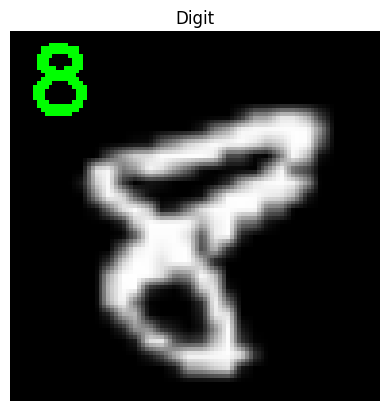

1/1 [==============================] - 0s 33ms/step
[INFO] Predicted: 0, Actual: 0


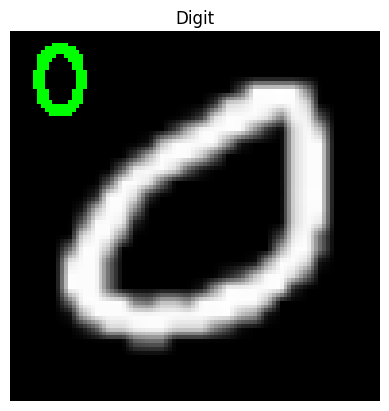

1/1 [==============================] - 0s 30ms/step
[INFO] Predicted: 1, Actual: 1


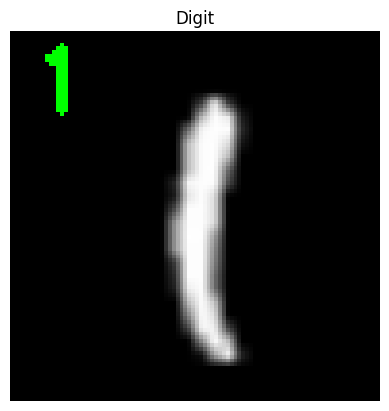

1/1 [==============================] - 0s 30ms/step
[INFO] Predicted: 7, Actual: 7


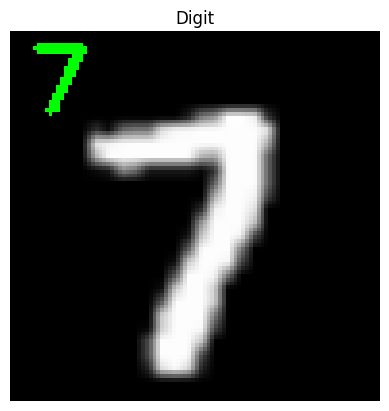

1/1 [==============================] - 0s 34ms/step
[INFO] Predicted: 7, Actual: 7


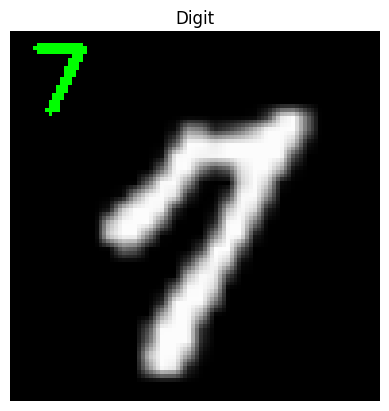

1/1 [==============================] - 0s 35ms/step
[INFO] Predicted: 7, Actual: 7


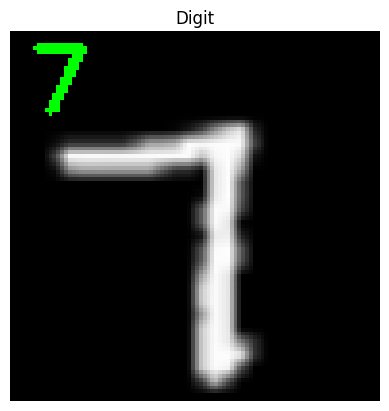

1/1 [==============================] - 0s 38ms/step
[INFO] Predicted: 3, Actual: 3


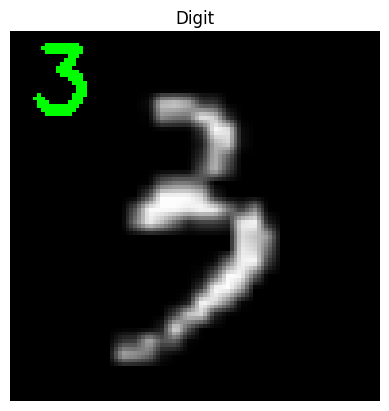

1/1 [==============================] - 0s 33ms/step
[INFO] Predicted: 4, Actual: 4


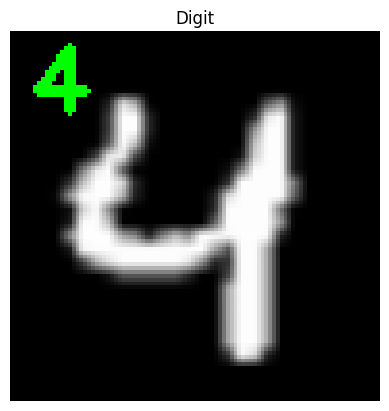

1/1 [==============================] - 0s 37ms/step
[INFO] Predicted: 9, Actual: 9


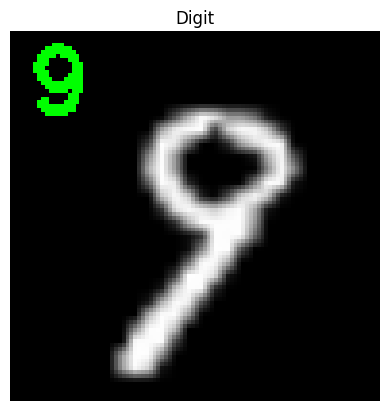

1/1 [==============================] - 0s 32ms/step
[INFO] Predicted: 0, Actual: 0


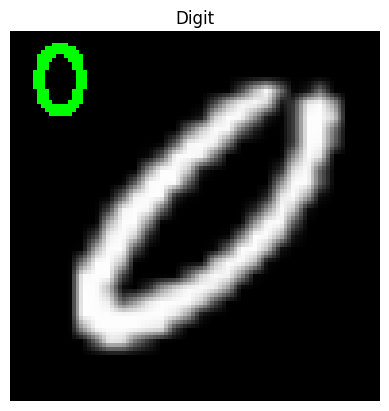

In [4]:
from pyimagesearch.cnn.networks.lenet import LeNet
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.optimizers import SGD
from keras.utils import np_utils
from keras import backend as K
import numpy as np
import cv2
from helper import draw

# grab the MNIST dataset (if this is your first time running this
# script, the download may take a minute -- the 55MB MNIST dataset
# will be downloaded)
print("[INFO] downloading MNIST...")
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()

# if we are using "channels first" ordering, then reshape the
# design matrix such that the matrix is:
# num_samples x depth x rows x columns
if K.image_data_format() == "channels_first":
	trainData = trainData.reshape((trainData.shape[0], 1, 28, 28))
	testData = testData.reshape((testData.shape[0], 1, 28, 28))

# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
	trainData = trainData.reshape((trainData.shape[0], 28, 28, 1))
	testData = testData.reshape((testData.shape[0], 28, 28, 1))

# scale data to the range of [0, 1]
trainData = trainData.astype("float32") / 255.0
testData = testData.astype("float32") / 255.0

# transform the training and testing labels into vectors in the
# range [0, classes] -- this generates a vector for each label,
# where the index of the label is set to `1` and all other entries
# to `0`; in the case of MNIST, there are 10 class labels
trainLabels = np_utils.to_categorical(trainLabels, 10)
testLabels = np_utils.to_categorical(testLabels, 10)

# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01)
model = LeNet.build(numChannels=1, imgRows=28, imgCols=28,
	numClasses=10,
	weightsPath="output/lenet_weights.hdf5")
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# show the accuracy on the testing set
print("[INFO] evaluating...")
(loss, accuracy) = model.evaluate(testData, testLabels, batch_size=128, verbose="2")
print("[INFO] accuracy: {:.2f}%".format(accuracy * 100))

# randomly select a few testing digits
for i in np.random.choice(np.arange(0, len(testLabels)), size=(10,)):
	# classify the digit
	probs = model.predict(testData[np.newaxis, i])
	prediction = probs.argmax(axis=1)

	# extract the image from the testData if using "channels_first"
	# ordering
	if K.image_data_format() == "channels_first":
		image = (testData[i][0] * 255).astype("uint8")

	# otherwise we are using "channels_last" ordering
	else:
		image = (testData[i] * 255).astype("uint8")

	# merge the channels into one image
	image = cv2.merge([image] * 3)

	# resize the image from a 28 x 28 image to a 96 x 96 image so we
	# can better see it
	image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)

	# show the image and prediction
	cv2.putText(image, str(prediction[0]), (5, 20),
				cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)
	print("[INFO] Predicted: {}, Actual: {}".format(prediction[0], np.argmax(testLabels[i])))
	draw("Digit", image)